Best alpha: 28.48035868435805
Test MSE: 2863.0334704709817
Test R^2: 0.459616559440264 


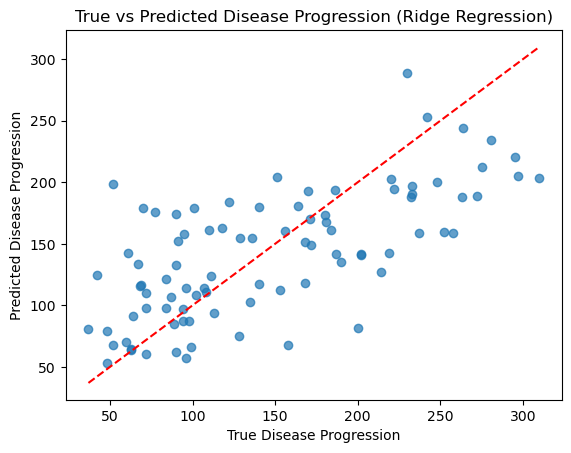

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target 

#Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Define a range of alpha
alpha = np.logspace(-4, 2, 100) #start from 10^-4 to 10^2

# Grid Search with Cross-Validation 
ridge = Ridge()
grid_search = GridSearchCV(ridge, {'alpha': alpha}, cv = 5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

#Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print('Best alpha:', best_alpha)

# Train final Ridge model with the best alpha
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, Y_train)

# Predict on test set
y_test_pred = best_ridge.predict(X_test)

#Evaluate 
test_mse = mean_squared_error(Y_test, y_test_pred)
test_r2 = r2_score(Y_test, y_test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R^2: {test_r2} ')

# Plot true vs predicted values
plt.scatter(Y_test, y_test_pred, alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('True Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.title('True vs Predicted Disease Progression (Ridge Regression)')
plt.show()

        